# Contents

[Area between curve and x-axis](#area-between-curve-and-x-axis)

[Area between curves](#area-between-curves)

[Area between curve and y-axis](#area-between-curve-and-y-axis)

# Area between curve and x-axis

![](./images/img.png)

![](./images/img_1.png)

![](./images/img_2.png)

![](./images/img_3.png)

![](./images/img_4.png)

![](./images/img_5.png)

# Area between curves 

![](./images/img_6.png)

![](./images/img_7.png)

![](./images/img_8.png)

![](./images/img_9.png)

![](./images/img_10.png)

![](./images/img_11.png)

![](./images/img_12.png)

In [1]:
import sympy as sp

x = sp.Symbol('x', real=True)
f1 = x ** 3 - 3 * x ** 2 + 1
f2 = 4 - x ** 2

# Solve for intersection:
sol = sp.solve(sp.Eq(f1, f2), x)
print("Intersections:", sol)

# Suppose we found only one real solution near 2.49:
x0 = 0
x1_approx = [r for r in sol if r.is_real][0]  # might be the real root
print("Numeric approx intersection:", x1_approx.evalf())

# Integrate top - bottom from 0 to that intersection:
area_expr = sp.integrate((f2 - f1), (x, 0, x1_approx))
print("Area exactly (symbolic):", area_expr.simplify())
print("Area numerically:", area_expr.evalf())


Intersections: [2/3 + (-1/2 - sqrt(3)*I/2)*(sqrt(113)/6 + 97/54)**(1/3) + 4/(9*(-1/2 - sqrt(3)*I/2)*(sqrt(113)/6 + 97/54)**(1/3)), 2/3 + 4/(9*(-1/2 + sqrt(3)*I/2)*(sqrt(113)/6 + 97/54)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(sqrt(113)/6 + 97/54)**(1/3), 4/(9*(sqrt(113)/6 + 97/54)**(1/3)) + 2/3 + (sqrt(113)/6 + 97/54)**(1/3)]
Numeric approx intersection: 2.48558399768860
Area exactly (symbolic): -97*sqrt(113)*2**(1/3)*(9*sqrt(113) + 97)**(2/3)/768 - sqrt(113)*2**(2/3)*(9*sqrt(113) + 97)**(1/3)/48 + 22/9 + 97*2**(2/3)*(9*sqrt(113) + 97)**(1/3)/144 + 3179*2**(1/3)*(9*sqrt(113) + 97)**(2/3)/2304
Area numerically: 8.15193993132123


![](./images/img_13.png)

![](./images/img_14.png)

![](./images/img_15.png)

![](./images/img_21.png)

![](./images/img_22.png)


Symbolically computed area = 2*sqrt(2)
Numerically approximated area (trapz) = 2.8284247937981752


/tmp/ipykernel_350461/1071188159.py:38: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area_trapz = np.trapz(diff_vals, xs)


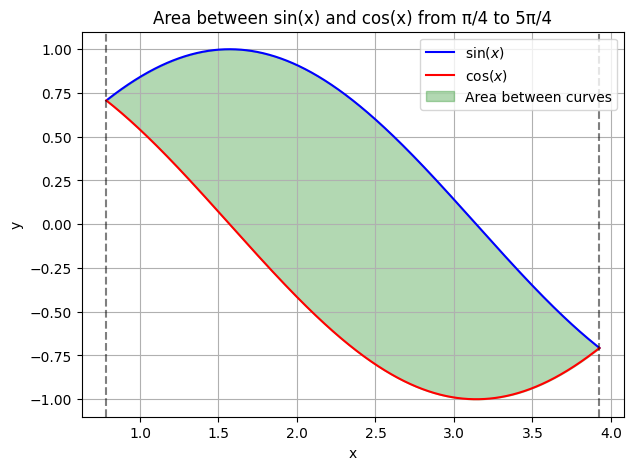

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# 1) Symbolic calculation with Sympy
x = sp.Symbol('x', real=True)
f_expr = sp.sin(x)
g_expr = sp.cos(x)

# Define the Sympy expressions for the integration limits
a_sym = sp.pi/sp.Integer(4)
b_sym = 5*sp.pi/sp.Integer(4)

# Symbolic integration
area_symbolic = sp.integrate(f_expr - g_expr, (x, a_sym, b_sym))
print("Symbolically computed area =", area_symbolic.simplify())

# 2) Numerical approximation using trapezoidal rule

# Convert the Sympy limits to Python floats
a_val = float(a_sym.evalf())
b_val = float(b_sym.evalf())

# Create a dense grid of x-values from a to b
xs = np.linspace(a_val, b_val, 1000)

# Define numeric versions of f and g
def f(x):
    return np.sin(x)

def g(x):
    return np.cos(x)

# Compute f - g on the grid
diff_vals = f(xs) - g(xs)

# Approximate the integral with trapz
area_trapz = np.trapz(diff_vals, xs)
print("Numerically approximated area (trapz) =", area_trapz)

# 3) Plot the functions and fill the area
plt.figure(figsize=(7,5))
plt.plot(xs, f(xs), label=r"$\sin(x)$", color="blue")
plt.plot(xs, g(xs), label=r"$\cos(x)$", color="red")

# Use fill_between to shade the region where sin(x) ≥ cos(x)
plt.fill_between(xs, f(xs), g(xs), where=(f(xs) >= g(xs)),
                 color="green", alpha=0.3, label="Area between curves")

# Vertical lines at the boundaries
plt.axvline(a_val, color="k", linestyle="--", alpha=0.5)
plt.axvline(b_val, color="k", linestyle="--", alpha=0.5)

plt.title("Area between sin(x) and cos(x) from π/4 to 5π/4")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Area between curve and y-axis

![](./images/img_16.png)

![](./images/img_17.png)

![](./images/img_18.png)

![](./images/img_19.png)

![](./images/img_20.png)

Calculated Area: 10.6666666666667


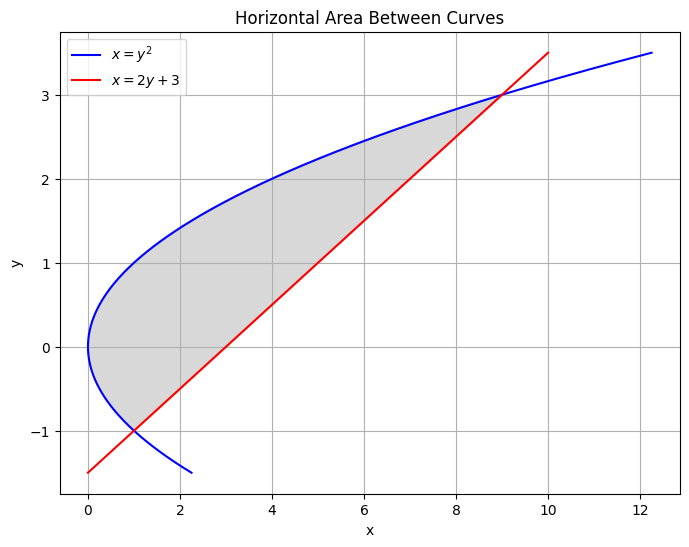

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define the symbolic variable
y = sp.Symbol('y')

# Define the functions
f_y = 2 * y + 3  # Line function
g_y = y ** 2  # Parabola function

# Compute the definite integral
area = sp.integrate(f_y - g_y, (y, -1, 3))
print(f"Calculated Area: {area.evalf()}")

# Plot the functions
y_vals = np.linspace(-1.5, 3.5, 400)
x1_vals = y_vals ** 2
x2_vals = 2 * y_vals + 3

plt.figure(figsize=(8, 6))
plt.plot(x1_vals, y_vals, label=r'$x = y^2$', color='blue')
plt.plot(x2_vals, y_vals, label=r'$x = 2y + 3$', color='red')
plt.fill_betweenx(y_vals, x1_vals, x2_vals, where=(x2_vals > x1_vals), color='gray', alpha=0.3)

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Horizontal Area Between Curves')
plt.legend()
plt.grid()
plt.show()
